
### Rohan Gopalan & Sushil Sharma     

### Student Id-6976086 & 6275151

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import probplot

import seaborn as sns


custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
#import the libraries
#making an array of custom colors for the indpendent variables


In [5]:

df = pd.read_csv("BTC_USD_Price_Prediction_Data.csv")

df.rename(columns = {'Closing Price (USD)':'Close', '24h High (USD)':'High'}, inplace = True)
df.rename(columns = {'24h Open (USD)':'Open', '24h Low (USD)':'Low'}, inplace = True)
#read the dataset
# rename the columns due to spacing error


In [6]:


df.head()
#first n rows

Unnamed: 0 Currency        Date      Close       Open       High        Low
0           0      BTC  2014-03-14  124.65499  125.30466  125.75166  123.56349
1           1      BTC  2014-03-15  126.45500  124.65499  126.75850  124.63383
2           2      BTC  2014-03-16  109.58483  126.45500  126.66566   84.32833
3           3      BTC  2014-03-17  119.67466  109.58483  119.67500  108.05816
4           4      BTC  2014-03-18  122.33866  119.67466  122.93633  119.00566

In [7]:
df.info()
# information about the data frame i.e number of columns ,name of columns ,number of cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2787 non-null   int64  
 1   Currency    2787 non-null   object 
 2   Date        2787 non-null   object 
 3   Close       2787 non-null   float64
 4   Open        2787 non-null   float64
 5   High        2787 non-null   float64
 6   Low         2787 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 152.5+ KB


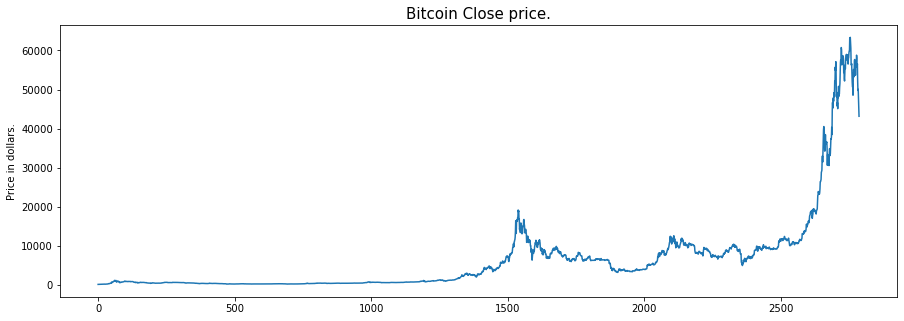

In [8]:



plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()
#The prices of the Bitcoin stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [9]:
df.describe()



Unnamed: 0         Close          Open          High           Low
count  2787.000000   2787.000000   2787.000000   2787.000000   2787.000000
mean   1393.000000   6530.845141   6514.579485   6711.061683   6303.417386
std     804.681925  10887.847444  10863.800772  11206.779756  10475.811252
min       0.000000    109.584830    109.584830    119.675000     84.328330
25%     696.500000    461.087500    460.400500    470.720995    451.818830
50%    1393.000000   2781.182500   2773.367500   2875.696250   2697.457500
75%    2089.500000   8507.923720   8497.887593   8764.291985   8222.060570
max    2786.000000  63347.789035  63563.673545  64802.787870  62095.632914

In [10]:
x=df[['Open','Low','High']]
x.head()
#X - independent features(excluding target variable)


Open        Low       High
0  125.30466  123.56349  125.75166
1  124.65499  124.63383  126.75850
2  126.45500   84.32833  126.66566
3  109.58483  108.05816  119.67500
4  119.67466  119.00566  122.93633

In [11]:
y=df[['Close']]
y.head()
# y - dependent variables, called (target).

Close
0  124.65499
1  126.45500
2  109.58483
3  119.67466
4  122.33866

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# training  and testing data



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [14]:

from sklearn.linear_model import LinearRegression

In [15]:

lm=LinearRegression()
# creating an instance of regression

In [16]:

lm.fit(x_train,y_train)
#training the model with data

LinearRegression()

In [17]:
# predict the data

In [18]:
a=lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

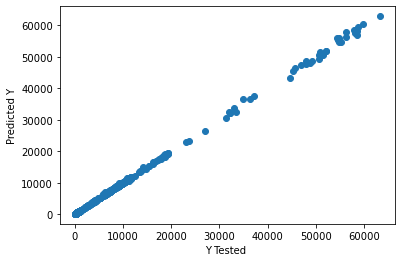

In [19]:
plt.scatter(x = y_test, y = a)
plt.xlabel('Y Tested ')
plt.ylabel('Predicted Y')

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, a))
print('MSE:', metrics.mean_squared_error(y_test, a))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, a)))


MAE: 74.37708779671374
MSE: 40826.057607869996
RMSE: 202.05459066269688


In [21]:
from sklearn.metrics import r2_score

In [22]:
predictions = lm.predict(x_test)
print('Accuracy of model : ', r2_score(predictions, y_test))
#his percentage shows how much our regression fits our data

Accuracy of model :  0.9996327111347617


In [23]:
df.isnull().sum()
# no null values provide in the dataset

Unnamed: 0    0
Currency      0
Date          0
Close         0
Open          0
High          0
Low           0
dtype: int64

In [24]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(25,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()
    # plotting our independent variables

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


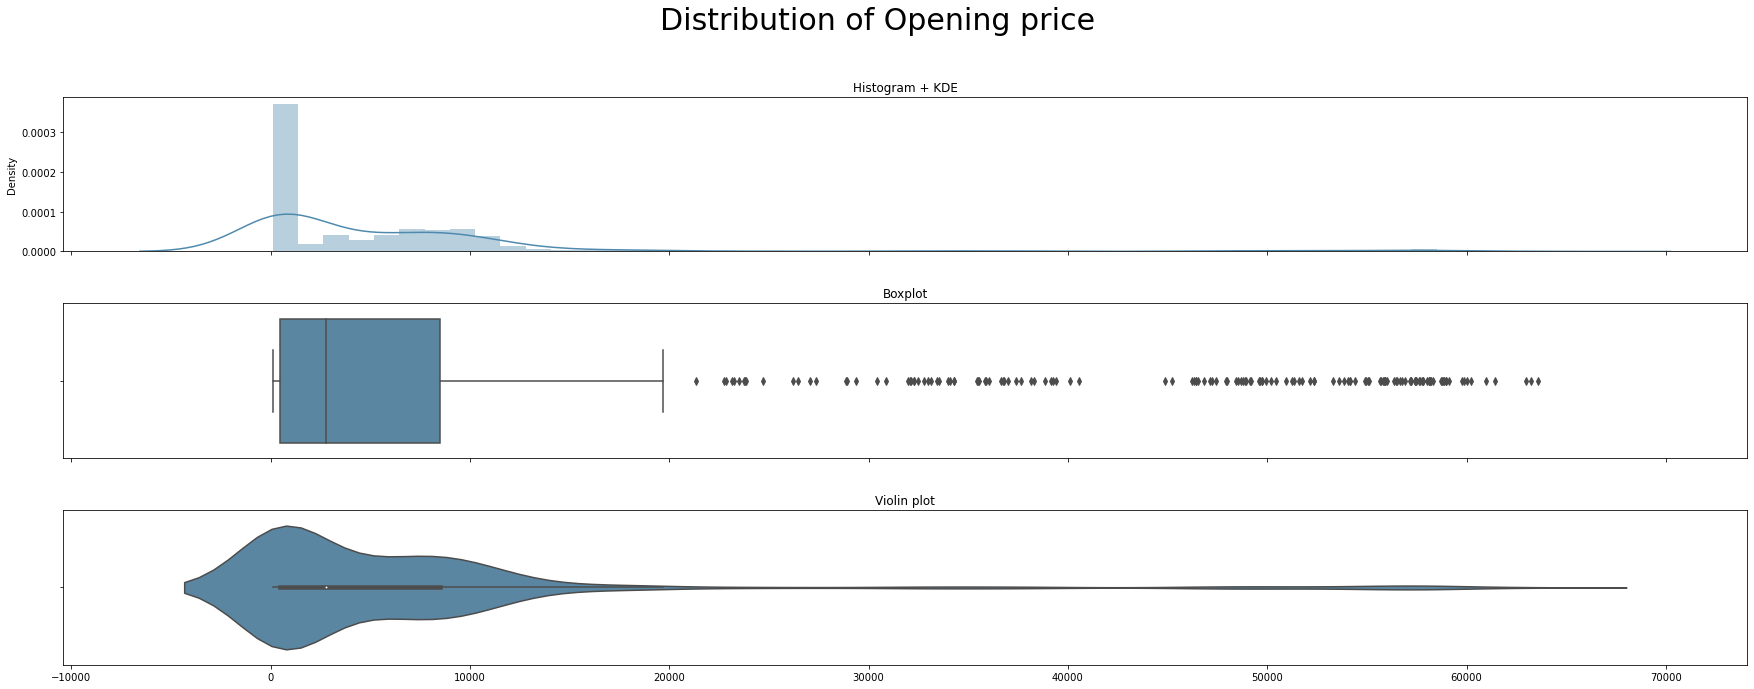

In [25]:
triple_plot(df['Open'],'Distribution of Opening price',custom_colors[0])
# the first independent variable we plotted the distribution looks fine as its a bell curve and box plot is skewed towars the left

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


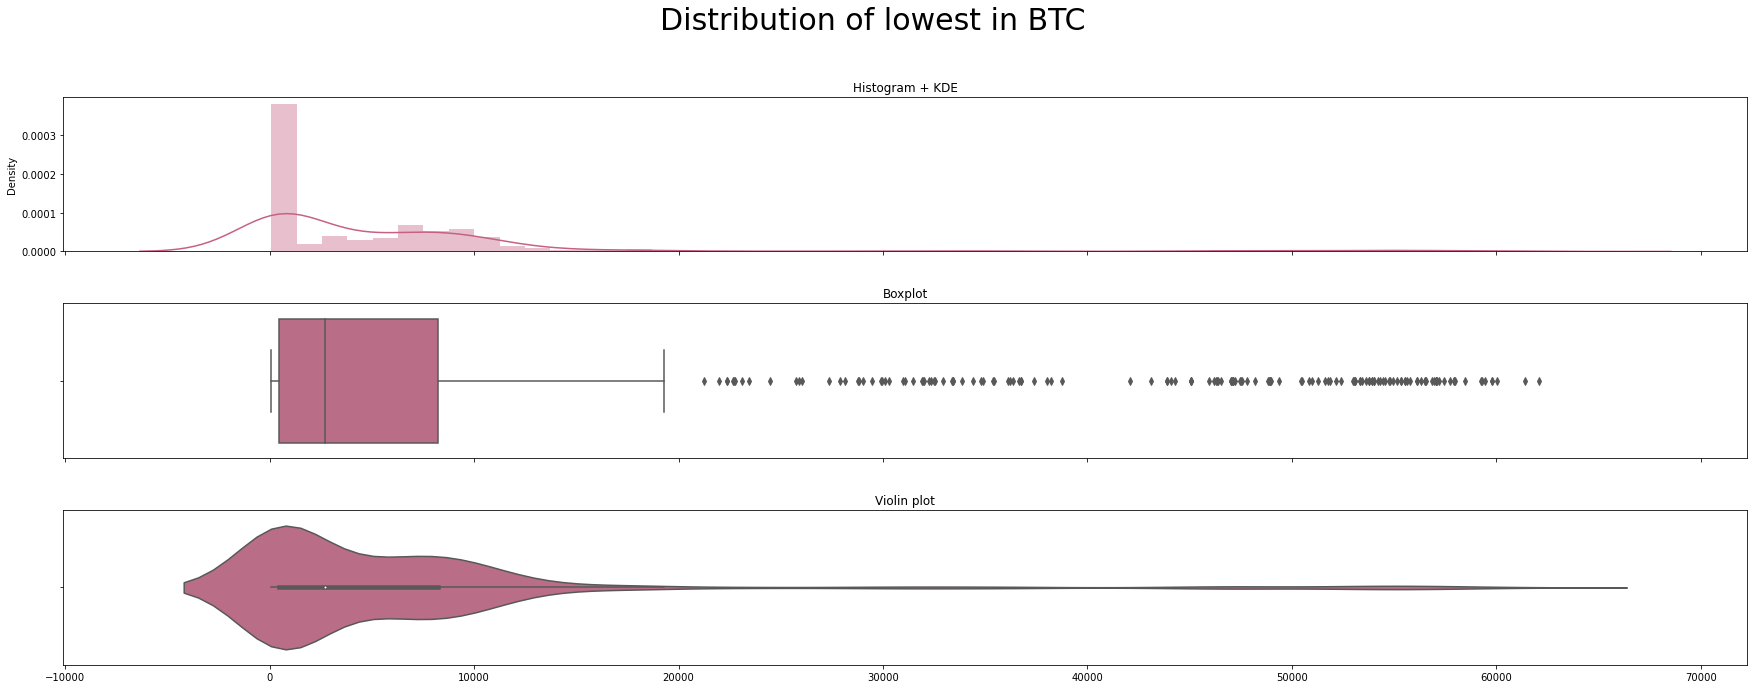

In [26]:

triple_plot(df['Low'],'Distribution of lowest in BTC ',custom_colors[1])
# the second  independent variable we plotted the distribution looks fine as its a bell curve and box plot is skewed towars the left

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


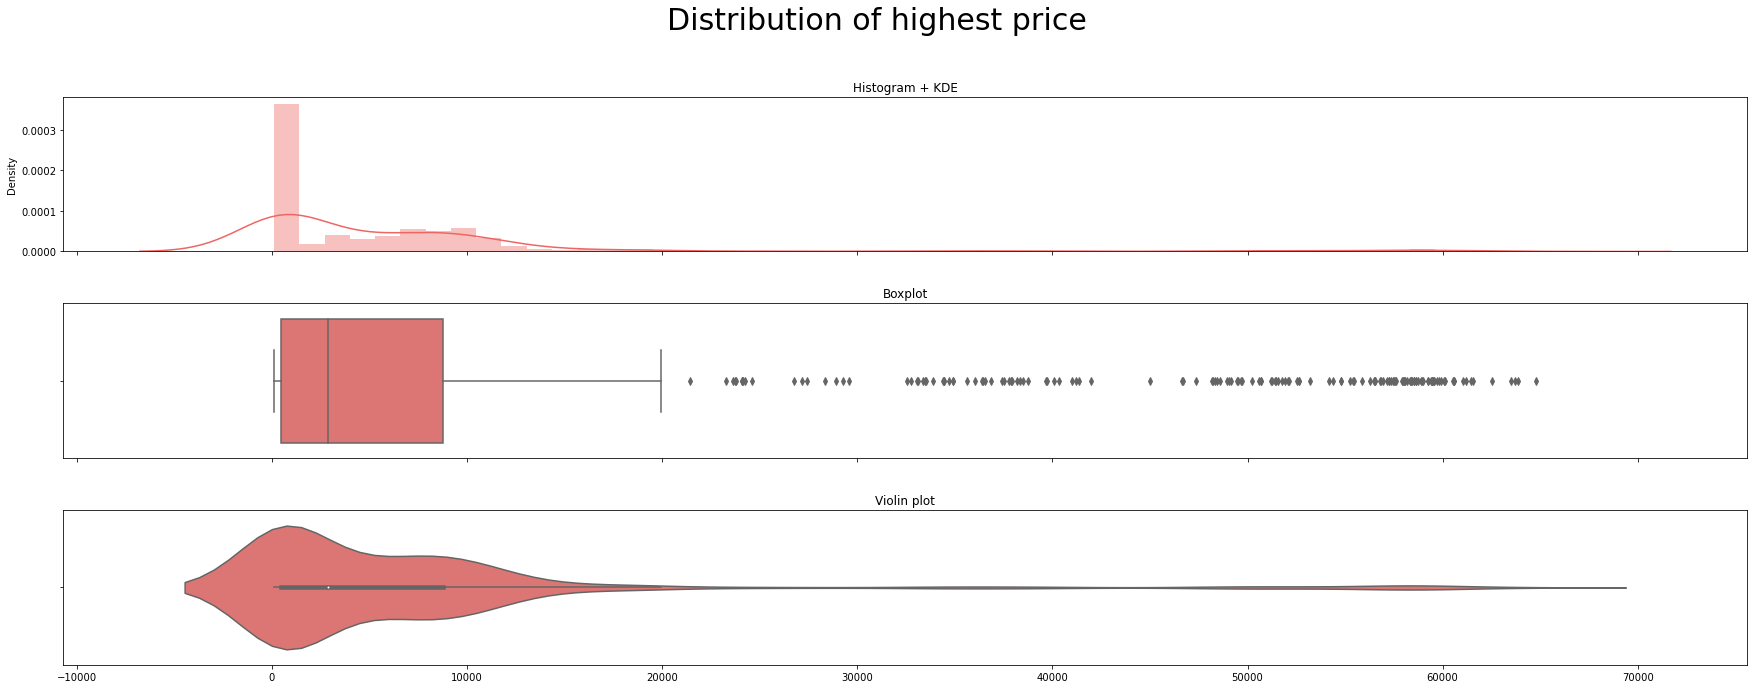

In [27]:
triple_plot(df['High'],'Distribution of highest price',custom_colors[2])
# the third independent variable we plotted the distribution looks fine as its a bell curve and box plot is skewed towars the left

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


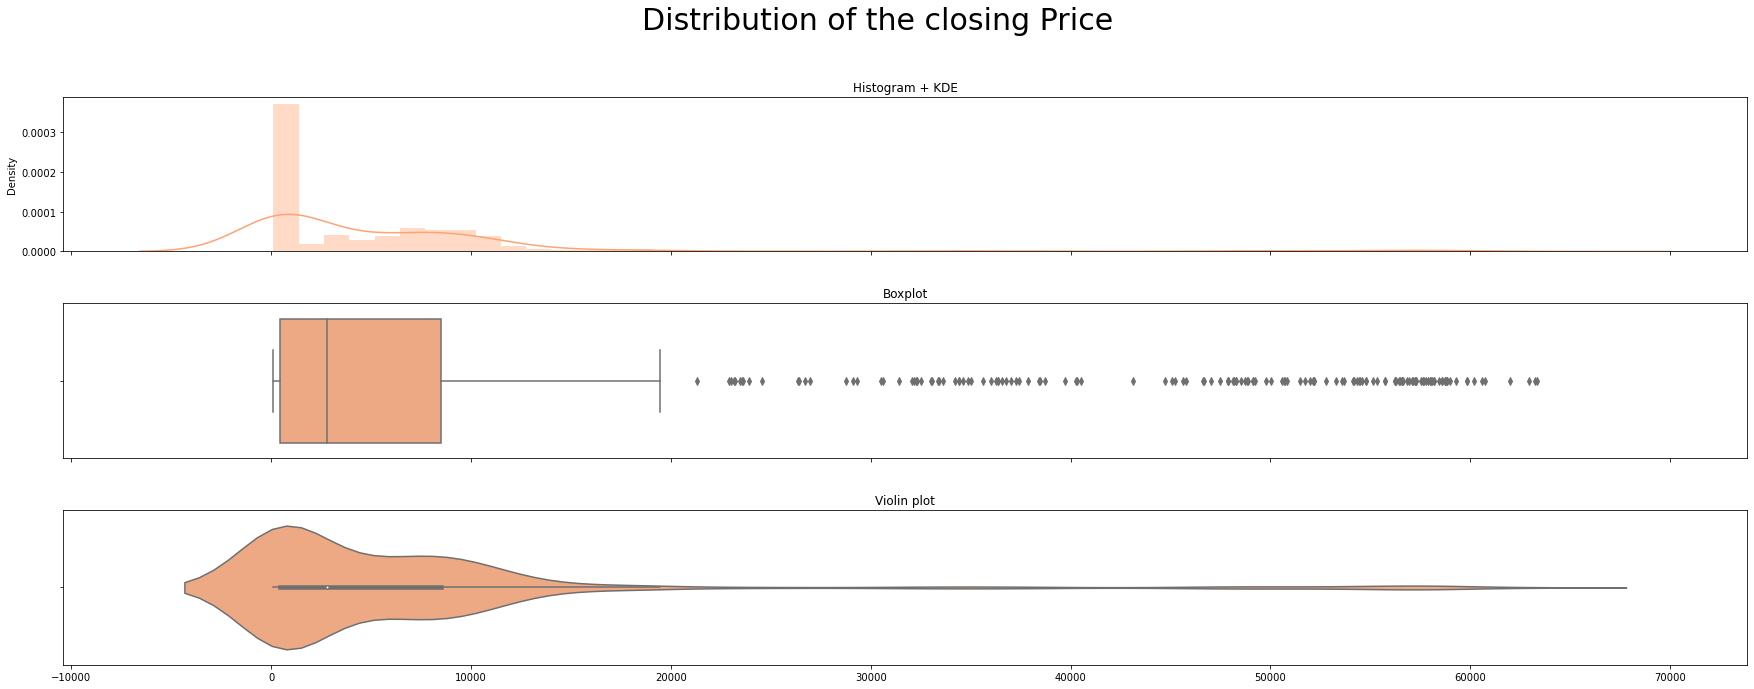

In [28]:
triple_plot(df['Close'],'Distribution of the closing Price',custom_colors[3])
# the response variable we plotted the distribution looks fine as its a bell curve and box plot is skewed towars the left

In [29]:
model = sm.formula.ols(formula= "Close ~ High + Low + Open", data= df)
multi_reg = model.fit()
print(multi_reg.summary())
# we used multiple regression cause there might be a correlation between our independent variables

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.211e+06
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:40:40   Log-Likelihood:                -19023.
No. Observations:                2787   AIC:                         3.805e+04
Df Residuals:                    2783   BIC:                         3.808e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1668      4.937     -0.439      0.6

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


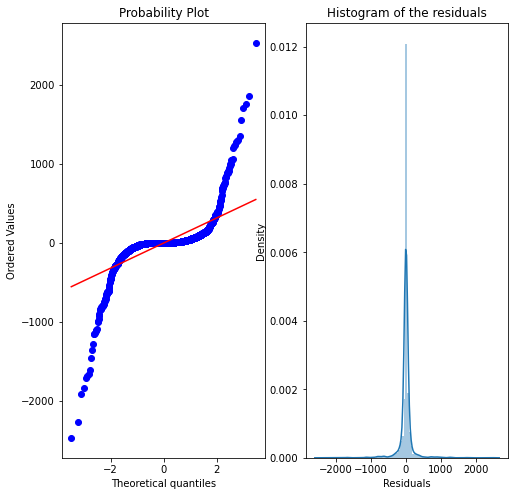

 A probability plot (left) and a histogram (right) of the residuals 


In [30]:
predicted_value = multi_reg.predict()
residuals = df['Close']-predicted_value

plt.figure(figsize=(8,8))
plt.subplot(121)
probplot(residuals, plot=plt)

plt.subplot(122)
sns.distplot(residuals, bins=100)
plt.title("Histogram of the residuals")
plt.xlabel("Residuals")
plt.show()
print(" A probability plot (left) and a histogram (right) of the residuals ")
#residuals follow a normal distributon but the left tail of the distribution drops gradually to a value of 0 density

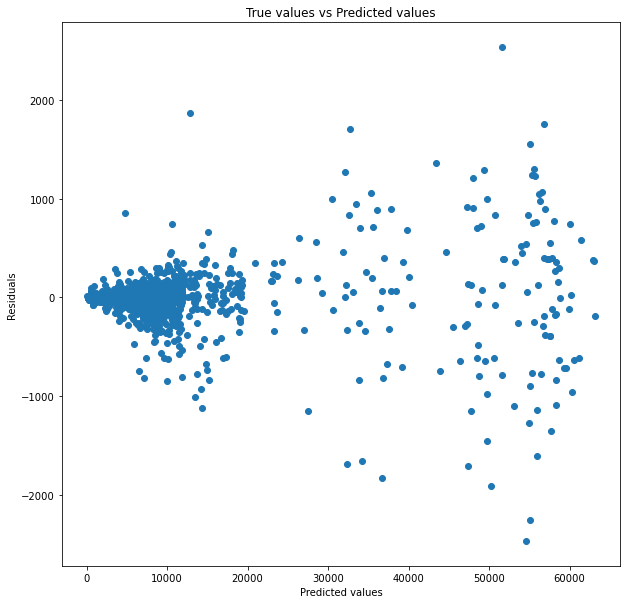

 A scatterplot of the residuals absolute value against the true value of the data from the coin_Bitcoin dataset


In [31]:
fig, (ax1) = plt.subplots(1, figsize=(10,10))

ax1.scatter(x = predicted_value, y = residuals)
ax1.set_title("True values vs Predicted values")
ax1.set_xlabel("Predicted values")
ax1.set_ylabel("Residuals")
plt.show()
print(" A scatterplot of the residuals absolute value against the true value of the data from the coin_Bitcoin dataset")

# the predicted values shows us a huge cluster around 0 to 20 dollars and then becomes scattered it was easier to predict prices on the beginning of the bitcoin lifespan

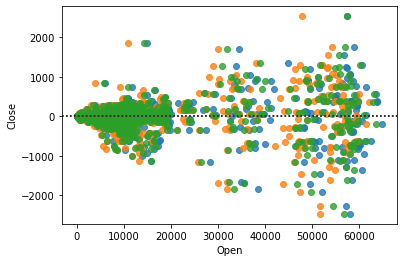

: A scatterplot showing overlap in distribution of High, Low and Open variables in the coin_Bitcoin dataset


In [32]:

sns.residplot(x=df["High"], y=residuals)

sns.residplot(x=df["Low"], y=residuals)

sns.residplot(x=df["Open"], y=residuals)
plt.show()
print(": A scatterplot showing overlap in distribution of High, Low and Open variables in the coin_Bitcoin dataset")
#scatterplot for variables high low open are when compared against residuals 

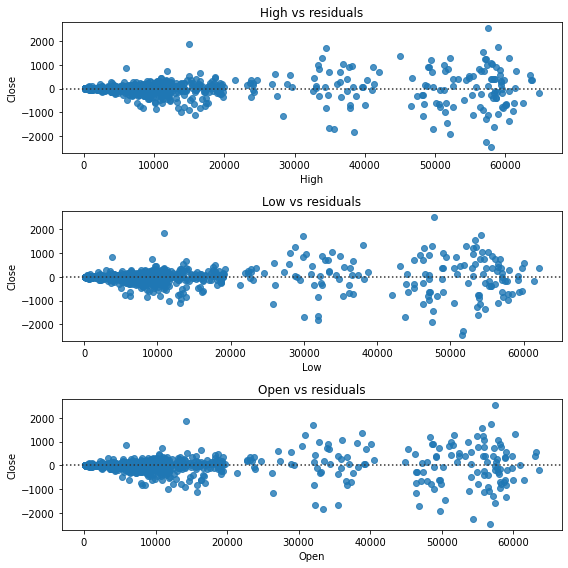

Top: Variable High against residuals. Middle: Variable Low against residuals. Bottom: Variable Open against residuals.


In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))

sns.residplot(ax=ax1, x=df["High"], y=residuals)
ax1.set_title("High vs residuals")

sns.residplot(ax=ax2, x=df["Low"], y=residuals)
ax2.set_title("Low vs residuals")

sns.residplot(ax=ax3, x=df["Open"], y=residuals)
ax3.set_title("Open vs residuals")
plt.tight_layout()
plt.show()

print("Top: Variable High against residuals. Middle: Variable Low against residuals. Bottom: Variable Open against residuals.")
# similar like above but done indivually once it pases 20 dollars variance increases alot that means variance is there which violates the  condition

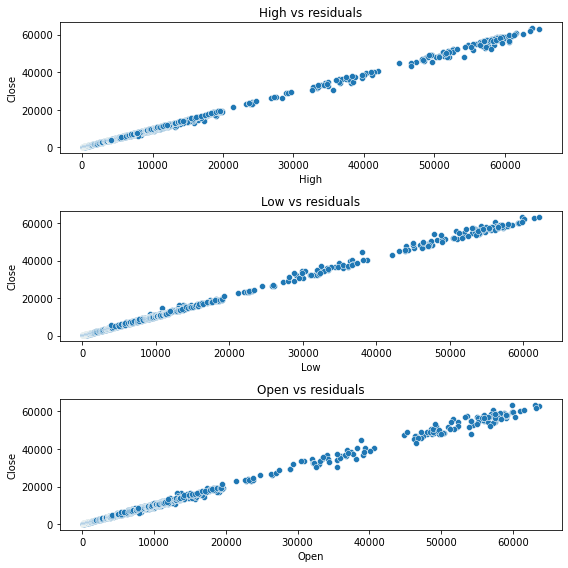

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))

sns.scatterplot(ax=ax1, x=df["High"], y=df["Close"])
ax1.set_title("High vs residuals")

sns.scatterplot(ax=ax2, x=df["Low"], y=df["Close"])
ax2.set_title("Low vs residuals")

sns.scatterplot(ax=ax3, x=df["Open"], y=df["Close"])
ax3.set_title("Open vs residuals")
plt.tight_layout()
plt.show()
# while assesing final validity we can confirm linearity has been met
